In [1]:
import h5py
import numpy as np
import matplotlib
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
import pandas as pd
from pandas import HDFStore,DataFrame
import time
import os
import mmap

In [17]:
# #Reading the file

sample_name = "train_chunk_0_19999999"
df_JCR  = pd.read_hdf('/lstore/calo/martafsilva/Xbb/Jet_color_ring/May19_Analysis/JCR_dataframes_May19/df_JCR_tt_%s.h5'%sample_name, key='table')
# df_JCR

In [18]:
# #i didn't have enough memory to read the training data so i had to do it like this 
# sample_name = "train"
# # Open the file in binary mode for memory mapping
# with open("/lstore/calo/martafsilva/Xbb/Jet_color_ring/May15_Analysis/JCR_dataframes_May15/df_JCR_%s.csv" % sample_name, "r+b") as file:
#     # Create a memory-mapped array of the file
#     mmapped_file = mmap.mmap(file.fileno(), 0, access=mmap.ACCESS_READ)

#     # Find the size of the file
#     file_size = mmapped_file.size()

#     # Read the memory-mapped file using Pandas
#     df_JCR = pd.read_csv(mmapped_file, delimiter=',', index_col=None)


In [19]:
# Considering only QCD events 

df_JCR_QCD = df_JCR[df_JCR["flavour_label"] == 3]
#df_JCR_QCD = df_JCR[(df_JCR["flavour_label"] == 3)| (df_JCR["flavour_label"] == 0)]
df_JCR_QCD  = df_JCR_QCD.reset_index(drop=True)


In [20]:
df_JCR_QCD

,pt,eta,abs_eta,mass,Xbb2020v3_Higgs,Xbb2020v3_QCD,Xbb2020v3_Top,GN2Xv00_phbb,GN2Xv00_phcc,GN2Xv00_ptop,...,eta_3,energy_3,mass_3,HadronConeExclTruthLabelID_3,deta_3,dphi_3,valid_3,jet_color_ring_tt,jet_color_ring_tt_l,XbbScore
0,9.083674e+05,0.749820,0.749820,114265.421875,0.009257,0.848449,0.142294,0.015632,0.115676,0.050292,...,0.898624,31002.009766,3592.397217,0,0.148804,-0.210062,True,NaN,NaN,-4.518019
1,8.962244e+05,0.738276,0.738276,128020.257812,0.038644,0.773181,0.188175,0.022829,0.023364,0.048873,...,0.594850,15899.918945,2845.396240,0,-0.143427,0.092137,True,NaN,NaN,-2.996126
2,1.027171e+06,-1.088627,1.088627,121138.562500,0.014314,0.731193,0.254493,0.006153,0.282863,0.075451,...,-0.975276,114298.539062,4454.620605,0,0.113351,0.050460,True,NaN,NaN,-3.933445
3,6.903708e+05,-0.931508,0.931508,115327.398438,0.123475,0.770041,0.106484,0.145175,0.370668,0.033388,...,NaN,NaN,NaN,0,0.000000,0.000000,False,NaN,NaN,-1.830406
4,3.320680e+05,1.038076,1.038076,125130.226562,0.040314,0.535438,0.424248,0.022958,0.151563,0.165228,...,NaN,NaN,NaN,0,0.000000,0.000000,False,NaN,NaN,-2.586376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1441108,5.955319e+05,-0.160471,0.160471,120575.015625,0.049206,0.754915,0.195879,0.031765,0.071014,0.071211,...,NaN,NaN,NaN,0,0.000000,0.000000,False,NaN,NaN,-2.730597
1441109,8.797079e+05,-0.659700,0.659700,120053.851562,0.070710,0.848844,0.080447,0.897187,0.003788,0.003844,...,-0.582241,31043.496094,4045.655273,0,0.077459,-0.346553,True,13.319433,0.271023,-2.485291
1441110,4.948352e+05,0.421462,0.421462,133873.406250,0.003176,0.884372,0.112451,0.047449,0.120755,0.127915,...,0.011776,29591.001953,4613.067383,0,-0.409686,-0.301726,True,NaN,NaN,-5.629182
1441111,4.935980e+05,1.003529,1.003529,110119.453125,0.002144,0.268454,0.729402,0.005308,0.017314,0.767901,...,0.707766,70383.484375,4479.100098,0,-0.295763,-0.248537,True,NaN,NaN,-4.829909


In [21]:
def QCD_category(row):
    # Create a dictionary for each subjet
    subjet1 = {"pt": row["pt_1"], "eta": row["eta_1"], "mass": row["mass_1"], "HadronConeExclTruthLabelID": row["HadronConeExclTruthLabelID_1"], "deta": row["deta_1"], "dphi": row["dphi_1"], "valid": row["valid_1"]}
    subjet2 = {"pt": row["pt_2"], "eta": row["eta_2"], "mass": row["mass_2"], "HadronConeExclTruthLabelID": row["HadronConeExclTruthLabelID_2"], "deta": row["deta_2"], "dphi": row["dphi_2"], "valid": row["valid_2"]}
    subjet3 = {"pt": row["pt_3"], "eta": row["eta_3"], "mass": row["mass_3"], "HadronConeExclTruthLabelID": row["HadronConeExclTruthLabelID_3"], "deta": row["deta_3"], "dphi": row["dphi_3"], "valid": row["valid_3"]}

    subjets = [subjet1, subjet2, subjet3]
    
    #filters the subjets that are not valid -> gives it Nan
    if not all([subjet["valid"] for subjet in subjets]):
        return np.nan
    
    #Identify which subjet corresponds to a, b and k
    # a and b -> analogous to the hard partons -> higher pt
    #k -> analogous to the soft gluon -> smaller pt
    
    a = max(subjets, key=lambda x: x["pt"])
    k = min(subjets, key=lambda x: x["pt"])
    
    #we will have only one element in the list so we select the first one
    b = [x for x in subjets if x != a and x != k][0]
    
    if a['HadronConeExclTruthLabelID'] == 5 and b['HadronConeExclTruthLabelID'] == 5:
        return "bb" 
    
    if (a['HadronConeExclTruthLabelID'] == 5 and b['HadronConeExclTruthLabelID'] == 4) or (a['HadronConeExclTruthLabelID'] == 4 and b['HadronConeExclTruthLabelID'] == 5) :
        return "bc" 
    
    if a['HadronConeExclTruthLabelID'] == 4 and b['HadronConeExclTruthLabelID'] == 4:
        return "cc" 
    
    if (a['HadronConeExclTruthLabelID'] == 5 and b['HadronConeExclTruthLabelID'] == 0) or (a['HadronConeExclTruthLabelID'] == 0 and b['HadronConeExclTruthLabelID'] == 5) :
        return "bl" 
    
    if (a['HadronConeExclTruthLabelID'] == 4 and b['HadronConeExclTruthLabelID'] == 0) or (a['HadronConeExclTruthLabelID'] == 0 and b['HadronConeExclTruthLabelID'] == 4) :
        return "cl" 
    
    if a['HadronConeExclTruthLabelID'] == 0 and b['HadronConeExclTruthLabelID'] == 0:
        return "ll" 
    
    else:
        return "et"

In [22]:
df_JCR_QCD  = df_JCR_QCD.dropna().reset_index(drop=True)


# Apply the function to each row of the DataFrame
df_JCR_QCD["QCD_category"] = df_JCR_QCD.apply(QCD_category, axis=1)


Text(0.5, 1.0, 'train_chunk_0_19999999 dataset')

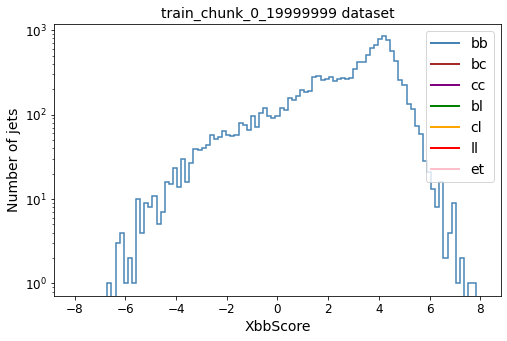

In [23]:
plt.figure(figsize = (8,5))

#Plotting the histograms
rang = np.linspace(-8,8,100)

bins = plt.hist(df_JCR_QCD[df_JCR_QCD["QCD_category"]== "bb"]["XbbScore"], bins = rang, histtype='step',  color = 'steelblue', lw =1.5)
plt.plot([], [],color = 'steelblue',linewidth=2, label="bb")
plt.hist(df_JCR_QCD[df_JCR_QCD["QCD_category"] == "bc"]["XbbScore"], bins[1], histtype='step',  color='brown', lw=1.5)
plt.plot([], [], color='brown', linewidth=2, label="bc")
plt.hist(df_JCR_QCD[df_JCR_QCD["QCD_category"] ==  "cc"]["XbbScore"], bins[1], histtype='step',  color='purple', lw=1.5)
plt.plot([], [], color='purple', linewidth=2, label="cc")
plt.hist(df_JCR_QCD[df_JCR_QCD["QCD_category"] == "bl"]["XbbScore"], bins[1], histtype='step', color='green', lw=1.5)
plt.plot([], [], color='green', linewidth=2, label="bl")
plt.hist(df_JCR_QCD[df_JCR_QCD["QCD_category"] == "cl"]["XbbScore"], bins[1], histtype='step', color='orange', lw=1.5)
plt.plot([], [], color='orange', linewidth=2, label="cl")
plt.hist(df_JCR_QCD[df_JCR_QCD["QCD_category"] == "ll"]["XbbScore"], bins[1], histtype='step', color='red', lw=1.5)
plt.plot([], [], color='red', linewidth=2, label="ll")
plt.hist(df_JCR_QCD[df_JCR_QCD["QCD_category"] == "et"]["XbbScore"], bins[1], histtype='step', color='pink', lw=1.5)
plt.plot([], [], color='pink', linewidth=2, label="et")
# set the axis labels and title
plt.xlabel('XbbScore', fontsize=14)
plt.ylabel('Number of jets', fontsize=14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.yscale('log')
plt.legend(fontsize = 14)
plt.title('%s dataset'%sample_name, fontsize = 14)

Text(0.5, 1.0, 'train_chunk_0_19999999 dataset')

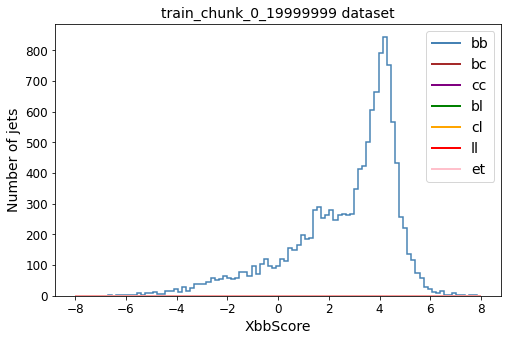

In [24]:
plt.figure(figsize = (8,5))

#Plotting the histograms
rang = np.linspace(-8,8,100)

bins = plt.hist(df_JCR_QCD[df_JCR_QCD["QCD_category"]== "bb"]["XbbScore"], bins = rang, histtype='step',  color = 'steelblue', lw =1.5)
plt.plot([], [],color = 'steelblue',linewidth=2, label="bb")
plt.hist(df_JCR_QCD[df_JCR_QCD["QCD_category"] == "bc"]["XbbScore"], bins[1], histtype='step',  color='brown', lw=1.5)
plt.plot([], [], color='brown', linewidth=2, label="bc")
plt.hist(df_JCR_QCD[df_JCR_QCD["QCD_category"] ==  "cc"]["XbbScore"], bins[1], histtype='step',  color='purple', lw=1.5)
plt.plot([], [], color='purple', linewidth=2, label="cc")
plt.hist(df_JCR_QCD[df_JCR_QCD["QCD_category"] == "bl"]["XbbScore"], bins[1], histtype='step', color='green', lw=1.5)
plt.plot([], [], color='green', linewidth=2, label="bl")
plt.hist(df_JCR_QCD[df_JCR_QCD["QCD_category"] == "cl"]["XbbScore"], bins[1], histtype='step', color='orange', lw=1.5)
plt.plot([], [], color='orange', linewidth=2, label="cl")
plt.hist(df_JCR_QCD[df_JCR_QCD["QCD_category"] == "ll"]["XbbScore"], bins[1], histtype='step', color='red', lw=1.5)
plt.plot([], [], color='red', linewidth=2, label="ll")
plt.hist(df_JCR_QCD[df_JCR_QCD["QCD_category"] == "et"]["XbbScore"], bins[1], histtype='step', color='pink', lw=1.5)
plt.plot([], [], color='pink', linewidth=2, label="et")
# set the axis labels and title
plt.xlabel('XbbScore', fontsize=14)
plt.ylabel('Number of jets', fontsize=14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(fontsize = 14)
plt.title('%s dataset'%sample_name, fontsize = 14)

/lstore/calo/martafsilva/envs/venv_xbb/lib/python3.6/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/lstore/calo/martafsilva/envs/venv_xbb/lib/python3.6/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/lstore/calo/martafsilva/envs/venv_xbb/lib/python3.6/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/lstore/calo/martafsilva/envs/venv_xbb/lib/python3.6/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/lstore/calo/martafsilva/envs/venv_xbb/lib/python3.6/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/lstore/calo/martafsilva/envs/venv_xbb/lib/python3.6/site-packages/num

Text(0.5, 1.0, 'train_chunk_0_19999999 dataset')

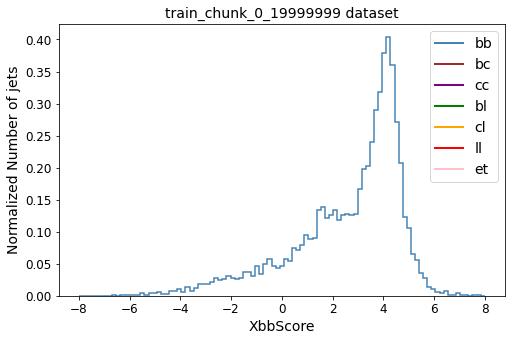

In [25]:
plt.figure(figsize = (8,5))

#Plotting the histograms
rang = np.linspace(-8,8,100)

bins = plt.hist(df_JCR_QCD[df_JCR_QCD["QCD_category"]== "bb"]["XbbScore"], bins = rang, density = True,histtype='step',  color = 'steelblue', lw =1.5)
plt.plot([], [],color = 'steelblue',linewidth=2, label="bb")
plt.hist(df_JCR_QCD[df_JCR_QCD["QCD_category"] == "bc"]["XbbScore"], bins[1], density = True ,histtype='step',  color='brown', lw=1.5)
plt.plot([], [], color='brown', linewidth=2, label="bc")
plt.hist(df_JCR_QCD[df_JCR_QCD["QCD_category"] ==  "cc"]["XbbScore"], bins[1], density = True, histtype='step',  color='purple', lw=1.5)
plt.plot([], [], color='purple', linewidth=2, label="cc")
plt.hist(df_JCR_QCD[df_JCR_QCD["QCD_category"] == "bl"]["XbbScore"], bins[1], density = True, histtype='step', color='green', lw=1.5)
plt.plot([], [], color='green', linewidth=2, label="bl")
plt.hist(df_JCR_QCD[df_JCR_QCD["QCD_category"] == "cl"]["XbbScore"], bins[1], density = True, histtype='step', color='orange', lw=1.5)
plt.plot([], [], color='orange', linewidth=2, label="cl")
plt.hist(df_JCR_QCD[df_JCR_QCD["QCD_category"] == "ll"]["XbbScore"], bins[1], density = True, histtype='step', color='red', lw=1.5)
plt.plot([], [], color='red', linewidth=2, label="ll")
plt.hist(df_JCR_QCD[df_JCR_QCD["QCD_category"] == "et"]["XbbScore"], bins[1], density = True, histtype='step', color='pink', lw=1.5)
plt.plot([], [], color='pink', linewidth=2, label="et")
# set the axis labels and title
plt.xlabel('XbbScore', fontsize=14)
plt.ylabel('Normalized Number of jets', fontsize=14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
#plt.yscale('log')
plt.legend(fontsize = 14)
plt.title('%s dataset'%sample_name, fontsize = 14)

/lstore/calo/martafsilva/envs/venv_xbb/lib/python3.6/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/lstore/calo/martafsilva/envs/venv_xbb/lib/python3.6/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/lstore/calo/martafsilva/envs/venv_xbb/lib/python3.6/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/lstore/calo/martafsilva/envs/venv_xbb/lib/python3.6/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/lstore/calo/martafsilva/envs/venv_xbb/lib/python3.6/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/lstore/calo/martafsilva/envs/venv_xbb/lib/python3.6/site-packages/num

Text(0.5, 1.0, 'train_chunk_0_19999999 dataset')

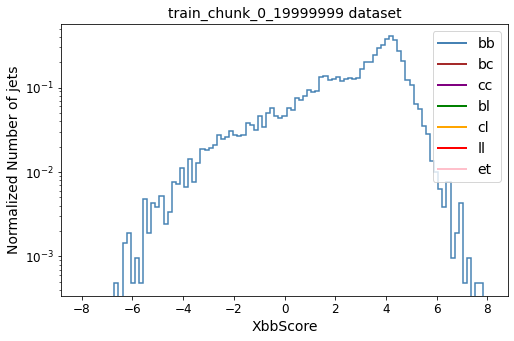

In [26]:
plt.figure(figsize = (8,5))

#Plotting the histograms
rang = np.linspace(-8,8,100)

bins = plt.hist(df_JCR_QCD[df_JCR_QCD["QCD_category"]== "bb"]["XbbScore"], bins = rang, density = True,histtype='step',  color = 'steelblue', lw =1.5)
plt.plot([], [],color = 'steelblue',linewidth=2, label="bb")
plt.hist(df_JCR_QCD[df_JCR_QCD["QCD_category"] == "bc"]["XbbScore"], bins[1], density = True ,histtype='step',  color='brown', lw=1.5)
plt.plot([], [], color='brown', linewidth=2, label="bc")
plt.hist(df_JCR_QCD[df_JCR_QCD["QCD_category"] ==  "cc"]["XbbScore"], bins[1], density = True, histtype='step',  color='purple', lw=1.5)
plt.plot([], [], color='purple', linewidth=2, label="cc")
plt.hist(df_JCR_QCD[df_JCR_QCD["QCD_category"] == "bl"]["XbbScore"], bins[1], density = True, histtype='step', color='green', lw=1.5)
plt.plot([], [], color='green', linewidth=2, label="bl")
plt.hist(df_JCR_QCD[df_JCR_QCD["QCD_category"] == "cl"]["XbbScore"], bins[1], density = True, histtype='step', color='orange', lw=1.5)
plt.plot([], [], color='orange', linewidth=2, label="cl")
plt.hist(df_JCR_QCD[df_JCR_QCD["QCD_category"] == "ll"]["XbbScore"], bins[1], density = True, histtype='step', color='red', lw=1.5)
plt.plot([], [], color='red', linewidth=2, label="ll")
plt.hist(df_JCR_QCD[df_JCR_QCD["QCD_category"] == "et"]["XbbScore"], bins[1], density = True, histtype='step', color='pink', lw=1.5)
plt.plot([], [], color='pink', linewidth=2, label="et")
# set the axis labels and title
plt.xlabel('XbbScore', fontsize=14)
plt.ylabel('Normalized Number of jets', fontsize=14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.yscale('log')
plt.legend(fontsize = 14)
plt.title('%s dataset'%sample_name, fontsize = 14)